In [8]:
import cv2
import torch
import torch.nn.functional as F

from model_hourglass import StackedHourGlass
from utils import to_cuda
from visualize import visualize
import numpy as np

from super_resolution_test import *

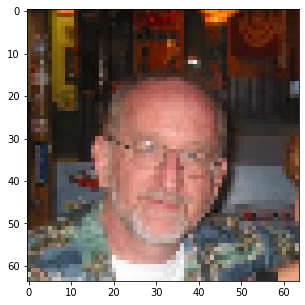

In [4]:
# Read example with resolution 32x32

path = 'results/test_images_64/img3.png'
img = cv2.imread(path, 1)[...,::-1]

_ = plt.figure(figsize=(5,5))
_ = plt.imshow(img)

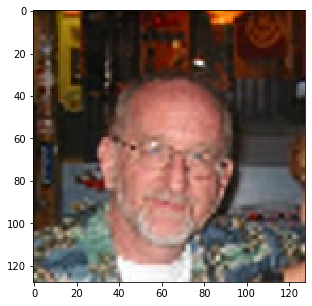

In [5]:
# Upscaling image with SubPixelCNN

up_scale = 2

up_CNN_img1 = super_resolve(path, up_scale)

_ = plt.figure(figsize=(5,5))
_ = plt.imshow(up_CNN_img1)

In [6]:
# Creating tensor with up-scaled image

up_CNN_img1 = up_CNN_img1[...,::-1] - np.zeros_like(up_CNN_img1) # Adjust RGB channels

img_3D = torch.from_numpy(up_CNN_img1.transpose(2, 0, 1)).float()
img_3D = (img_3D - 128) / 128.0
img_3D.shape

torch.Size([3, 128, 128])

In [9]:
# Creating 3D Reconstruction from image

saved_model = 'trained_models/hourglass_55_epochs'

model = StackedHourGlass(nChannels=224, nStack=2, nModules=2, numReductions=4, nOutputs=200)
model.cuda()
model.load_state_dict(torch.load(saved_model))
model.eval()

img_3D = to_cuda(img_3D.unsqueeze(0), True)
out = F.sigmoid(model(img_3D))

img_3D = img_3D.squeeze(0).cpu()
out = out.detach().squeeze(0).cpu()

visualize(img_3D, out, sz=0.25, thr=0.9)

Image shape: (3, 128, 128)
Volume shape: (200, 128, 128)
